## Step 1: Reading and Understanding the Data


### Importing and Understanding the data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing data
bike= pd.read_csv(r"C:\Users\saval\Downloads\day.csv")

In [3]:
# looking five rows of the data
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Preparation

In [4]:
bike.shape

(730, 16)

#### Check the null values

In [5]:
# checking null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# droping down instant column as it is sr no.
bike.drop(["instant"],axis=1,inplace=True)

In [9]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# drop column dteday
bike.drop(columns=["dteday","casual","registered"],axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data


In [11]:
# making pairplot for all numeric Variables
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


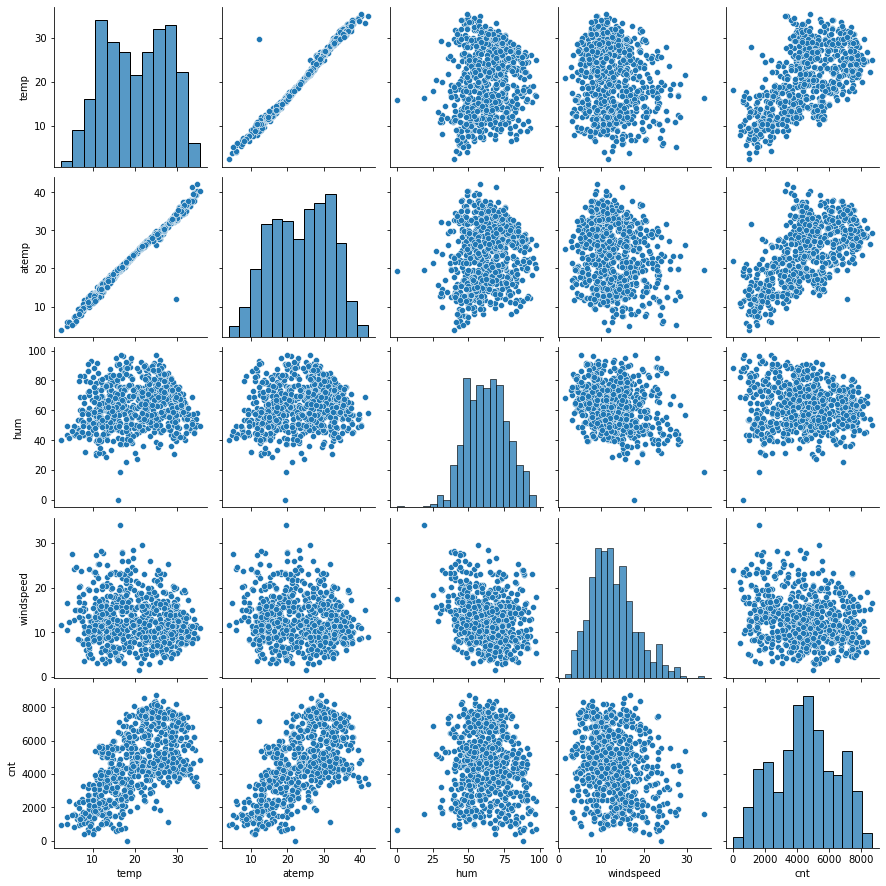

In [12]:
vars=["temp","atemp","hum","windspeed","cnt"]
sns.pairplot(bike[vars])
plt.show()


#### Insight
- There is linear relation between temp and atemp . 


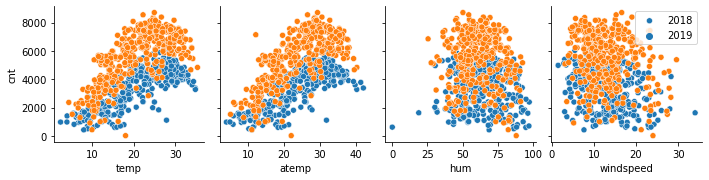

In [13]:
ax = sns.pairplot(x_vars=["temp", "atemp", "hum", "windspeed"], y_vars=["cnt"] , data=bike, hue="yr")
ax._legend.remove()
plt.legend(labels=["2018","2019"])
plt.show()


#### Insight
- Year can be a key parameter in a model because as compare to 2018, in 2019  all variable bike booking count is higher. 

In [14]:
# checking data if further cleaning is required
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [15]:
# renaming columns to make it more readable
bike.rename(columns={"mnth":"month","yr":"year"},inplace=True)

In [16]:

bike.season=bike.season.map({1:"spring",2:"summer",3:"fall",4:"winter"})
bike.month=bike.month.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})
bike.weekday=bike.weekday.map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"})
bike.weathersit=bike.weathersit.map({1:"clear",2:"mist and cloudy",3:"light snow",4:"heavy rain"})
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,mist and cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,mist and cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


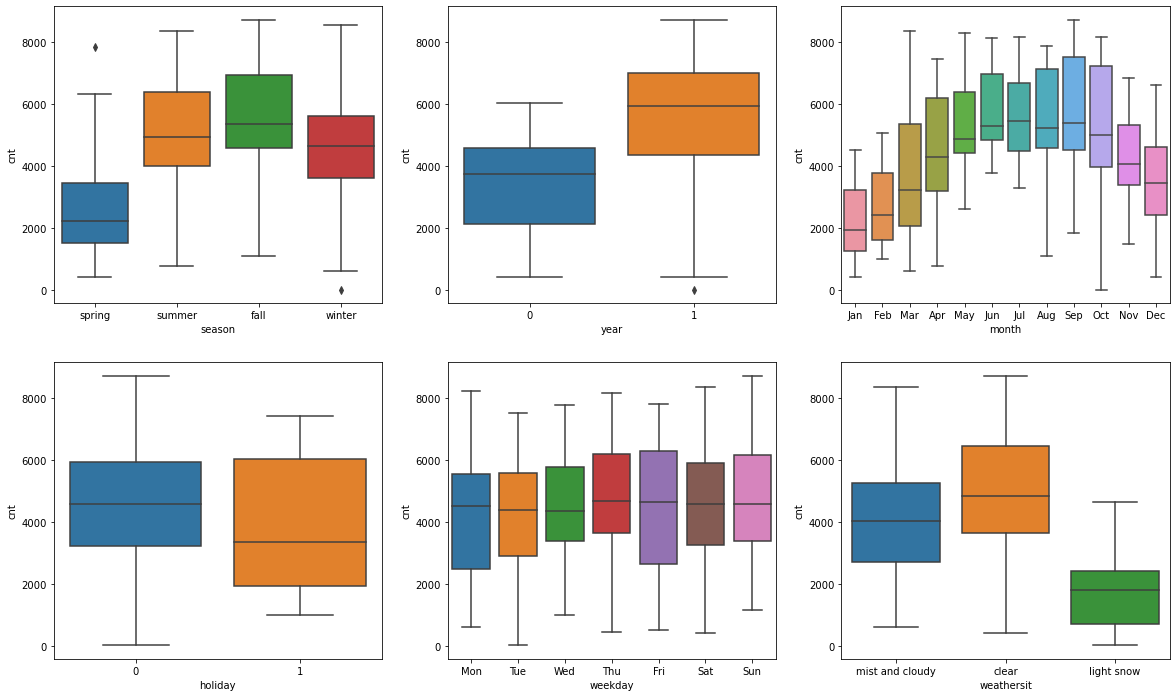

In [17]:
# creating boxplot for categorical columns with target variable 'cnt'

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x ="season",y ="cnt",data=bike)
plt.subplot(2,3,2)
sns.boxplot(x ="year",y="cnt",data=bike)
plt.subplot(2,3,3)
sns.boxplot(x ="month",y ="cnt",data=bike)
plt.subplot(2,3,4)
sns.boxplot(x="holiday",y="cnt",data=bike)
plt.subplot(2,3,5)
sns.boxplot(x="weekday",y="cnt",data=bike)
plt.subplot(2,3,6)
sns.boxplot(x="weathersit",y="cnt",data=bike)
plt.show()

#### Note:- weathersit
     - clear: 
       Clear, Few clouds, Partly cloudy, Partly cloudy
	 - mist and cloudy: 
       Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	 - light snow: 
       Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	 - heavy rain:
       Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


##### Season

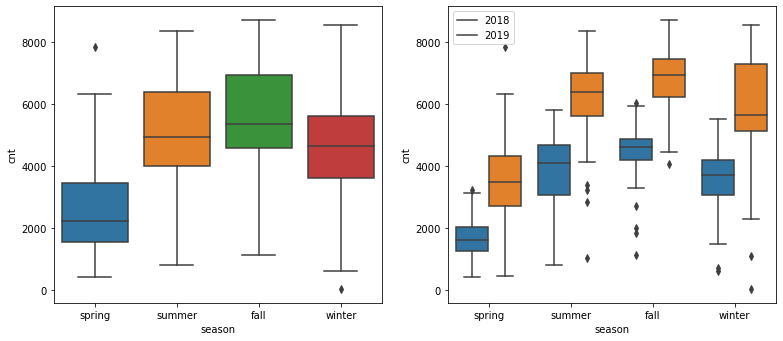

In [18]:
def cat_var_plot(col,x,y):
    plt.figure(figsize=(x,y))
    plt.subplot(2,3,1)
    sns.boxplot(col,"cnt",data=bike)
    plt.subplot(2,3,2)
    sns.boxplot(col,"cnt",hue="year",data=bike)
    plt.legend(labels=["2018","2019"])
    return
cat_var_plot("season",20,12)


In [19]:
# function for percentage detail to make it more easy to understand
def cat_agg(col):
    cat_bike = bike.groupby(col)['cnt'].agg(['sum','count']).sort_values('sum',ascending=False)
    cat_bike['sum_per']=cat_bike['sum']/bike.cnt.sum()*100
    cat_bike['count_per']=cat_bike['count']/bike.cnt.count()*100
    return round(cat_bike,1)

In [20]:
cat_agg("season")

,sum,count,sum_per,count_per
season,,,,
fall,1061129,188,32.2,25.8
summer,918589,184,27.9,25.2
winter,841613,178,25.6,24.4
spring,469514,180,14.3,24.7


#### Insights
- The trend of booking is following same pattern for all season for particular year.
- Around 32% booking were made in fall and it is followed by summer and winter approx 28% and 26% respectively.
- It can be shown that season can be used as a predector of depended variable.

##### Year

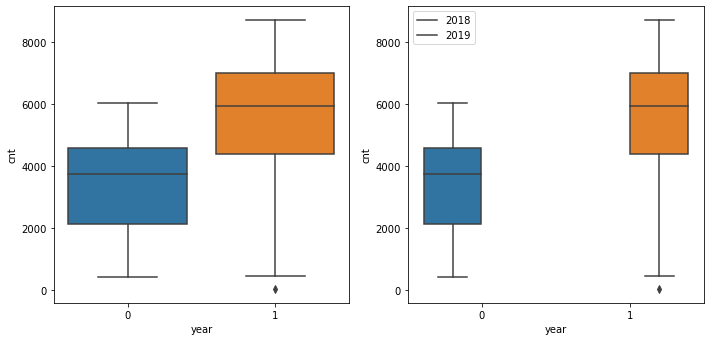

In [21]:
cat_var_plot("year",18,12)


In [22]:
cat_agg("year")

,sum,count,sum_per,count_per
year,,,,
1,2047742,365,62.2,50.0
0,1243103,365,37.8,50.0


#### Insight
- Bike rental demand is higher in 2019 as compare to 2018.

##### Month

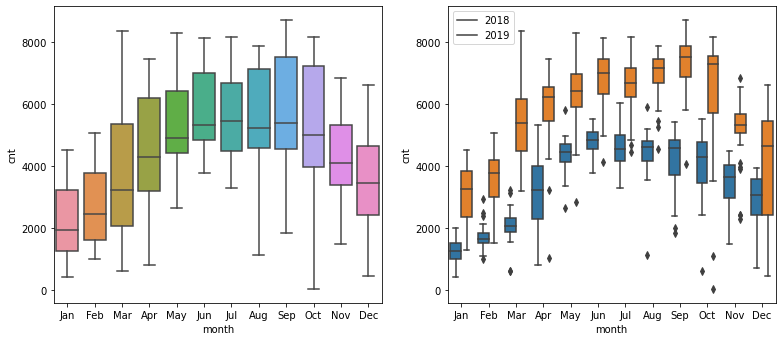

In [23]:
cat_var_plot("month",20,12)


In [24]:
cat_agg("month")

,sum,count,sum_per,count_per
month,,,,
Aug,351194,62,10.7,8.5
Jun,346342,60,10.5,8.2
Sep,345991,60,10.5,8.2
Jul,344948,62,10.5,8.5
May,331686,62,10.1,8.5
Oct,322352,62,9.8,8.5
Apr,269094,60,8.2,8.2
Nov,254831,60,7.7,8.2
Mar,228920,62,7.0,8.5


#### Insight
- From the month of May to Sep bike booking was approx 10%.
- And it is approx 4% in Jan it means it is good predector for the depended variable.

##### Holiday

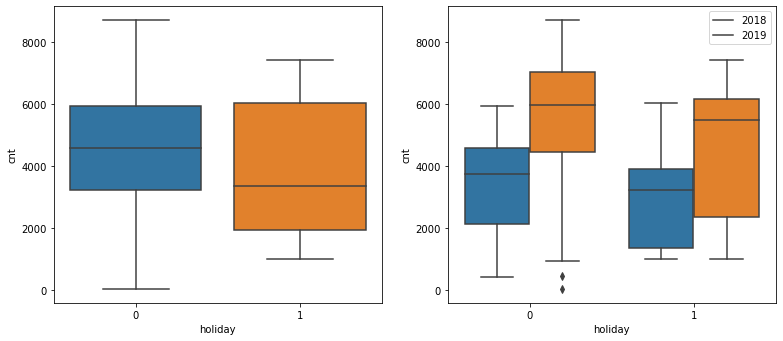

In [25]:
cat_var_plot("holiday",20,12)


In [26]:
cat_agg("holiday")

,sum,count,sum_per,count_per
holiday,,,,
0,3212410,709,97.6,97.1
1,78435,21,2.4,2.9


#### Insight
- Approx 97% bike bookings were made in working day(not holiday).

##### Weekday

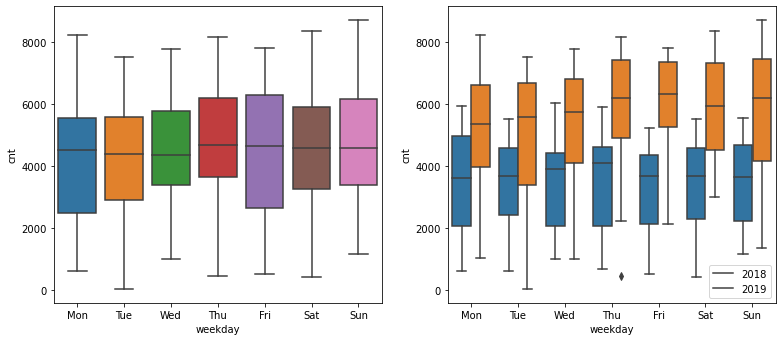

In [27]:
cat_var_plot("weekday",20,12)


In [28]:
cat_agg("weekday")

,sum,count,sum_per,count_per
weekday,,,,
Thu,487923,104,14.8,14.2
Sun,485235,104,14.7,14.2
Sat,481176,104,14.6,14.2
Fri,478132,104,14.5,14.2
Wed,462276,104,14.0,14.2
Tue,448822,105,13.6,14.4
Mon,447281,105,13.6,14.4


#### Insight
- Further analysis is required for this variable as it is showing very close trend of approx 14% from Mon to Sun for bike bookings.


##### Working day

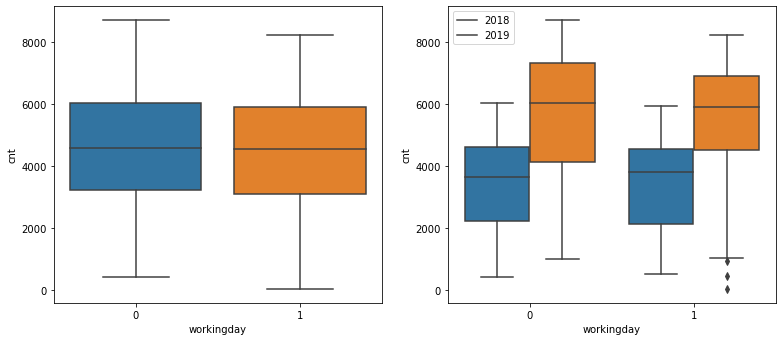

In [29]:
cat_var_plot("workingday",20,12)


In [30]:
cat_agg("workingday")

,sum,count,sum_per,count_per
workingday,,,,
1,2253988,504,68.5,69.0
0,1036857,226,31.5,31.0


#### Insight`
- Approx 69% bike booking were made in working day as it is more than double than non working day.
- It means it is good predector for dependent variable.

##### Weathersit

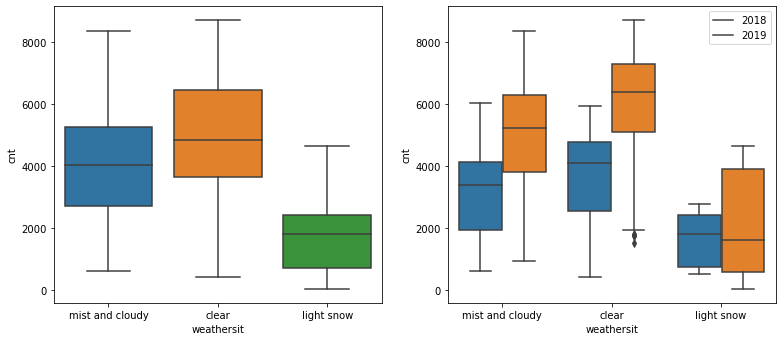

In [31]:
cat_var_plot("weathersit",20,12)


In [32]:
cat_agg("weathersit")

,sum,count,sum_per,count_per
weathersit,,,,
clear,2257952,463,68.6,63.4
mist and cloudy,995024,246,30.2,33.7
light snow,37869,21,1.2,2.9


#### Insight
- Approx 68% of the bike booking were made in clear weather situation for two years.
- This was followed by mist and cloudy weathersituation with approx 30% for two years.
- It means that weather situation affect bike bookings so that it can be a predector for depended variable.
- There is no data for Heavy rain

## Step-3 Data Preparation


##### Creating dummy varible

In [33]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,mist and cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,mist and cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [34]:
def dummies(x,df):
    temp = pd.get_dummies(df[x],drop_first= True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the bikeSharing
bike = dummies("season",bike)
bike = dummies("month",bike)
bike = dummies("weekday",bike)
bike = dummies("weathersit",bike)
bike.head()


,year,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light snow,mist and cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
bike.shape

(730, 30)

In [36]:
# merging the dataframe
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   spring           730 non-null    uint8  
 9   summer           730 non-null    uint8  
 10  winter           730 non-null    uint8  
 11  Aug              730 non-null    uint8  
 12  Dec              730 non-null    uint8  
 13  Feb              730 non-null    uint8  
 14  Jan              730 non-null    uint8  
 15  Jul              730 non-null    uint8  
 16  Jun              730 non-null    uint8  
 17  Mar             

 All columns are in numeric values so it is ready to split in train and test dataframe

## Step 4: Splitting the Data into Training and Testing Sets


In [37]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 120)

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
# apply scaler() to all the columns except the dummies
num_vars=["temp","atemp","hum","windspeed","cnt"]
bike_train[num_vars]=scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,year,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light snow,mist and cloudy
557,1,0,1,0.818284,0.770256,0.550216,0.296736,0.870034,0,0,...,0,0,0,0,0,0,0,0,0,0
629,1,0,0,0.736253,0.711117,0.671862,0.623114,0.981249,0,0,...,0,1,0,0,1,0,0,0,0,0
503,1,0,0,0.673950,0.652800,0.474026,0.146917,0.969413,0,1,...,0,0,0,0,1,0,0,0,0,0
81,0,0,1,0.358646,0.346406,0.872275,0.505448,0.245986,0,1,...,0,0,0,0,0,0,0,0,0,1
709,1,0,1,0.366591,0.346973,0.619914,0.652825,0.642095,0,0,...,0,0,0,0,0,0,0,1,0,1


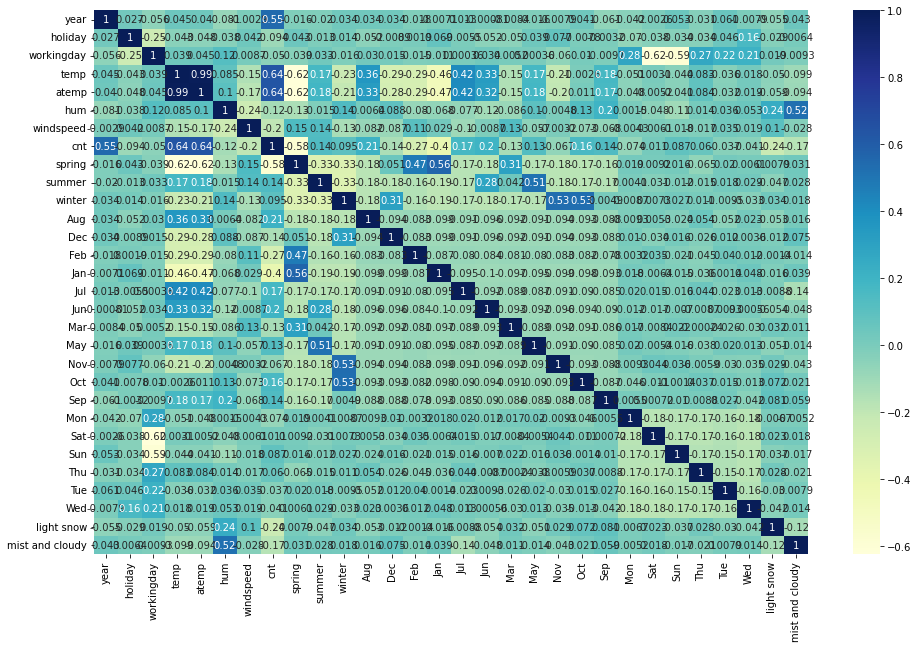

In [41]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Insight
- There is very high correlation so that only one variable is considerd.
- Temp and atemp has high coorelation with cnt.
- Months and weather has high correlation.
- Mist weather and hum has coorelation.
- Working day and sat and sun has high negative correlation.

In [42]:
bike_train.describe()

,year,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light snow,mist and cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.490196,0.027451,0.682353,0.539748,0.524640,0.650909,0.397182,0.520849,0.247059,0.24902,...,0.084314,0.076471,0.147059,0.152941,0.141176,0.143137,0.123529,0.154902,0.029412,0.339216
std,0.500395,0.163554,0.466018,0.230394,0.220184,0.147648,0.185127,0.227048,0.431725,0.43287,...,0.278131,0.266010,0.354512,0.360284,0.348545,0.350557,0.329367,0.362166,0.169124,0.473908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336479,0.330095,0.540801,0.259632,0.366167,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545191,0.542139,0.650649,0.370175,0.528302,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.707310,0.754654,0.502957,0.674147,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


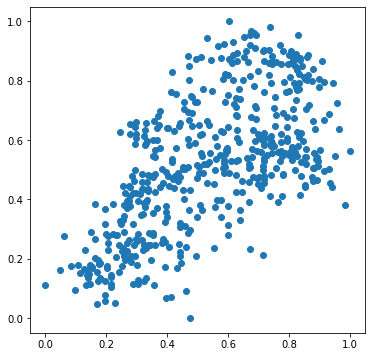

In [43]:
plt.figure(figsize=[6,6])
plt.scatter(bike_train.temp, bike_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [44]:
y_train = bike_train.pop("cnt")
X_train = bike_train

## Step 5: Building a linear model


In [45]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [46]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [47]:

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 16),
 ('winter', True, 1),
 ('Aug', False, 18),
 ('Dec', False, 3),
 ('Feb', False, 7),
 ('Jan', False, 6),
 ('Jul', True, 1),
 ('Jun', False, 19),
 ('Mar', False, 14),
 ('May', False, 9),
 ('Nov', False, 2),
 ('Oct', False, 15),
 ('Sep', False, 5),
 ('Mon', False, 12),
 ('Sat', False, 11),
 ('Sun', False, 20),
 ('Thu', False, 17),
 ('Tue', False, 8),
 ('Wed', False, 13),
 ('light snow', True, 1),
 ('mist and cloudy', False, 4)]

In [48]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'Jul', 'light snow'],
      dtype='object')

In [49]:
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'mist and cloudy'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [50]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [51]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [52]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,60.41
3,temp,53.46
4,atemp,52.24
7,spring,2.65
8,winter,1.79
9,Jul,1.26
5,hum,1.22
6,windspeed,1.17
10,light snow,1.11
1,year,1.02


In [53]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [54]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     222.8
Date:                Sat, 11 Jun 2022   Prob (F-statistic):          6.78e-177
Time:                        13:24:13   Log-Likelihood:                 466.08
No. Observations:                 510   AIC:                            -910.2
Df Residuals:                     499   BIC:                            -863.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3718      0.034     11.014      0.0

- atem is insignificant so it should be droped.

**Model-2**

In [55]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,60.17
3,temp,2.86
6,spring,2.65
7,winter,1.78
8,Jul,1.26
4,hum,1.21
5,windspeed,1.15
9,light snow,1.11
1,year,1.02
2,holiday,1.01


**Model**

In [57]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_new)

In [58]:
lm1 = sm.OLS(y_train,X_train_lm1).fit()   # Running the linear model

In [59]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     247.7
Date:                Sat, 11 Jun 2022   Prob (F-statistic):          6.04e-178
Time:                        13:24:13   Log-Likelihood:                 465.71
No. Observations:                 510   AIC:                            -911.4
Df Residuals:                     500   BIC:                            -869.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3736      0.034     11.094      0.0

In [60]:
X_train_new.columns

Index(['const', 'year', 'holiday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'Jul', 'light snow'],
      dtype='object')

In [61]:
X_train_new1 = X_train_new.drop(["hum"],axis=1)

In [62]:
X_train_new2 = X_train_new1.drop(["const"],axis=1)

In [63]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.62
2,temp,4.36
0,year,1.97
4,spring,1.64
5,winter,1.36
6,Jul,1.31
7,light snow,1.05
1,holiday,1.03


 hum variable is insignificant so it should be dropped.

In [64]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm2 = sm.add_constant(X_train_new2)

In [65]:
lm2 = sm.OLS(y_train,X_train_lm2).fit()   

In [66]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     237.4
Date:                Sat, 11 Jun 2022   Prob (F-statistic):          4.68e-165
Time:                        13:24:13   Log-Likelihood:                 432.50
No. Observations:                 510   AIC:                            -847.0
Df Residuals:                     501   BIC:                            -808.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1916      0.027      7.007      0.0

Insight
- This model looks good with less than 5 VIF and low p value for all variable.So that this can be considered as final model.

## Step 6: Residual Analysis of the train data


In [67]:
y_train_cnt = lm2.predict(X_train_lm2)

Text(0.5, 0, 'Errors')

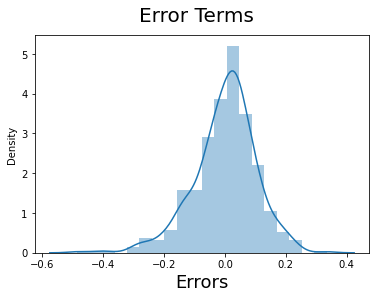

In [68]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 7: Making Predictions Using the Final Model
Now that the model is fitted and checked the normality of error terms, it's time to go ahead and make predictions using the final model.



In [69]:
#### Applying the scaling on the test sets
num_vars=["temp","atemp","hum","windspeed","cnt"]
bike_test[num_vars]=scaler.fit_transform(bike_test[num_vars])
bike_test.head()

,year,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light snow,mist and cloudy
49,0,0,1,0.402555,0.394262,0.000000,1.000000,0.124644,1,0,...,0,0,1,0,0,0,0,0,0,0
611,1,0,1,0.837060,0.792458,0.722783,0.417098,0.771238,0,0,...,0,1,0,0,0,0,0,1,0,0
547,1,0,1,0.911326,0.812874,0.330323,0.328840,0.692469,0,0,...,0,0,0,0,0,0,1,0,0,0
432,1,0,0,0.418072,0.401915,0.279341,0.800793,0.487449,1,0,...,0,0,0,1,0,0,0,0,0,1
489,1,0,0,0.698507,0.654625,0.724907,0.237957,0.773587,0,1,...,0,0,0,0,1,0,0,0,0,1


In [70]:
bike_test.describe()

,year,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,light snow,mist and cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.520548,0.031963,0.707763,0.541468,0.517251,0.563705,0.327339,0.490564,0.246575,0.260274,...,0.086758,0.095890,0.132420,0.118721,0.146119,0.141553,0.191781,0.114155,0.027397,0.333333
std,0.500722,0.176306,0.455833,0.238535,0.215331,0.183017,0.166663,0.238922,0.432005,0.439789,...,0.282125,0.295115,0.339723,0.324202,0.354034,0.349389,0.394604,0.318728,0.163612,0.472484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344362,0.343360,0.422464,0.213887,0.320762,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540000,0.529533,0.557621,0.308810,0.488686,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.754482,0.697167,0.698619,0.411763,0.691480,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [71]:
y_test = bike_test.pop("cnt")
X_test = bike_test

In [72]:
# Creating X_test_new dataframe by dropping variables
X_test_new2 = X_test[X_train_new2.columns]
# Adding a constant variable 
X_test_new2 = sm.add_constant(X_test_new2)


In [73]:
# Making predictions
y_pred = lm2.predict(X_test_new2)

## Step 8: Model Evaluation


Text(0, 0.5, 'y_pred')

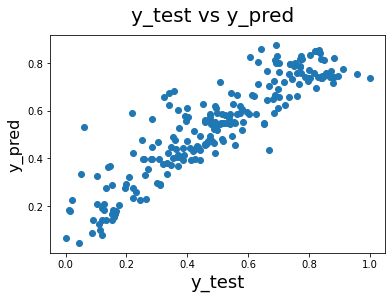

In [74]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

We have a final model that seems good to predict demand of bikes. The actual and predicted "cnt" is indicating that the model can be able to explain the change in demand very well.


We can see that the equation of our best fitted line is:

$ count = 0.231  \times  year - 0.112  \times  holiday + 0.507 \times temp - 0.07 \times windspeed - 0.1143 \times spring + 0.06 \times winter - 0.06 \times Jul - 0.2427 \times light snow$

#### Insight
Over all we have decent model.
Demand of bikes on rental mainly depends on five variables.
- 1. Year
- 2. Holiday
- 3. Temp
- 4. Windspeed
- 5. Spring

